# K-means++ Algorithm 

Clustering is used to group similar data points. K-Means is a commonly used clustering method, but it often gives poor results because the initial cluster centers are chosen randomly. This may lead to empty clusters, overlapping clusters or centroids falling too close to each other.

The Initialization Process
The algorithm follows these steps:

1. First center: Choose the first cluster center uniformly at random from the data points

2. Subsequent centers: For each remaining center:

Calculate the distance from each data point to its nearest existing center.
Choose the next center with probability proportional to the square of this distance.
Points farther from existing centers have a higher chance of being selected.
3. Standard K-means: Once all k centers are initialized, proceed with the standard K-means algorithm

The squared distance weighting is important it ensures that points far from existing centers are much more likely to be chosen, naturally spreading the centers across the data space.

## Implementation in Python

### 1. Dataset Creation

In [1]:
import numpy as np
import matplotlib.pyplot as plt

mean_01 = np.array([0.0, 0.0])
cov_01 = np.array([[1, 0.3], [0.3, 1]])
dist_01 = np.random.multivariate_normal(mean_01, cov_01, 100)

mean_02 = np.array([6.0, 7.0])
cov_02 = np.array([[1.5, 0.3], [0.3, 1]])
dist_02 = np.random.multivariate_normal(mean_02, cov_02, 100)

mean_03 = np.array([7.0, -5.0])
dist_03 = np.random.multivariate_normal(mean_03, cov_01, 100)

mean_04 = np.array([2.0, -7.0])
cov_04 = np.array([[1.2, 0.5], [0.5, 1.3]])
dist_04 = np.random.multivariate_normal(mean_04, cov_01, 100)

data = np.vstack((dist_01, dist_02, dist_03, dist_04))
np.random.shuffle(data)


### 2. Plotting Helper Function

In [2]:
def plot(data, centroids):
    plt.scatter(data[:, 0], data[:, 1], marker='.', color='gray', label='Data Points')
    if centroids.shape[0] > 1:
        plt.scatter(centroids[:-1, 0], centroids[:-1, 1], color='black', label='Selected Centroids')
    plt.scatter(centroids[-1, 0], centroids[-1, 1], color='red', label='Next Centroid')
    plt.title(f'Select {centroids.shape[0]}th Centroid')
    plt.legend()
    plt.xlim(-5, 12)
    plt.ylim(-10, 15)
    plt.show()

### 3. Euclidean Distance Function

In [3]:
def distance(p1, p2):
    return np.sqrt(np.sum((p1 - p2)**2))

### 4. K-Means++ Initialization

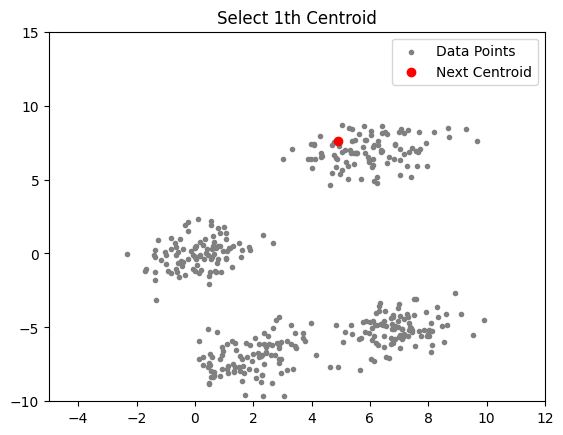

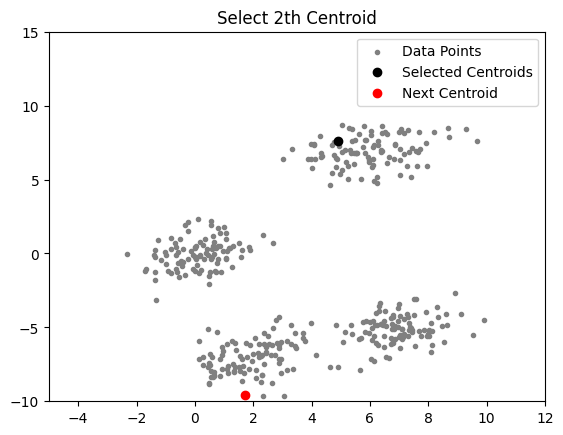

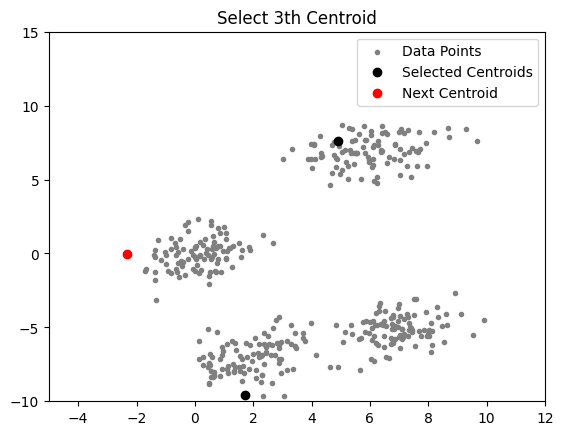

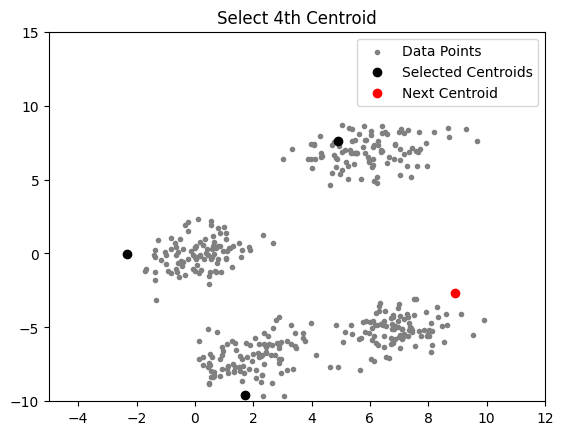

In [4]:
import sys

def initialize(data, k):
    centroids = []
    centroids.append(data[np.random.randint(data.shape[0])])
    plot(data, np.array(centroids))

    for _ in range(k - 1):
        distances = []
        for point in data:
            min_dist = min([distance(point, c) for c in centroids])
            distances.append(min_dist)
        
        next_centroid = data[np.argmax(distances)]
        centroids.append(next_centroid)
        plot(data, np.array(centroids))
    
    return np.array(centroids)

# Run initialization
centroids = initialize(data, k=4)

#### Applications of k-means++ algorithm
- Image segmentation: It can be used to segment images into different regions based on their color or texture features. This is useful in computer vision applications, such as object recognition or tracking.
- Customer segmentation: These are used to group customers into different segments based on their purchasing habits, demographic data or other characteristics. This is useful in marketing and advertising applications, as it can help businesses target their marketing efforts more effectively.
- Recommender systems: K-means++ can be used to recommend products or services to users based on their past purchases or preferences. This is useful in e-commerce and online advertising applications. 